## 03_TPF_Statistics

In diesem Jupyter Notebook werden Statistiken und Visualisierungen aus Daten der Punktwolken und der Metashape Reports generiert. 
Die Daten basieren auf Bilder der DJI Mini 3 Pro von den folgenden Aufnahmetagen:
11.03.2025 und
19.03.2025

### Import der Libraries

In [36]:
import pandas as pd
import glob
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

### Definition der Grundlagedaten

In [33]:
# CSV-Verzeichnis
csv_dir = "C:\\_Data\\BTh11\\BTh11_Trieblaengenwachstum\\03_TPF_Statistics\\03_BaseData"
print("Daten in CSV-Verzeichnis:", os.listdir(csv_dir))

# PointCloud-Verzeichnis
pc_dir = "F:\\530_PointClouds_TPF"
print("Daten in PointCloud-Verzeichnis:", os.listdir(pc_dir))



Daten in CSV-Verzeichnis: ['MetashapeReportData_20250311_DJIMini3Pro_Kirsche.csv', 'MetashapeReportData_20250319_DJIMini3Pro_Kirsche.csv', 'old']
Daten in PointCloud-Verzeichnis: ['20250311_DJIMini3Pro_Kirsche_TiePointFiltering_100.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_20.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_40.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_60.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_80.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_90.las']


### Import der CSV-Daten

In [34]:
# Laden aller CSV-Dateien MetashapeReportData_<ID>.csv finden
csv_files = glob.glob(os.path.join(csv_dir, "MetashapeReportData_*.csv"))

# Alle CSVs einlesen und in einer Liste speichern
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Alle DataFrames zusammenfügen
combined_df = pd.concat(df_list, ignore_index=True)

# Vorschau
display(HTML(combined_df.head(10).to_html(max_cols=200, notebook=True)))

,Aufnahme_ID,TPF,Anzahl_Ringe,Nadir,Anzahl_Bilder,Format,Windboehen,ImageAlignement_Accuracy,Key_Point_Limit,Tie_Point_Limit,Excl_Stationary_Tie_Pts,Guided_Img_Matching,Adaptive_Model_Fitting,Start_Points,Automatic_Filtering,Manual_Filtering,Reprojection_Error,Reconstruction_Uncertainty,Image_Count,Projection_Accuracy,Automatic_Detection,GCP_Accuracy_m,XY_Error_mm,Z_Error_mm,Total_Error_mm,Error_pix,Metashape_Report,Source_Data,PointCloud_Quality,Depth_Filtering,Point_Colors,Point_Confidence,Points_Total,Points_Tree
0,20250311_DJIMini3Pro_Kirsche,100%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,319000,NaN,NaN,NaN,NaN,True,0.01,9.42,3.69,10.12,3.89,True,DM,U-High,Mild,True,True,378.0,NaN
1,20250311_DJIMini3Pro_Kirsche,90%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,287000,NaN,52.0,NaN,24.0,True,0.01,10.41,3.72,11.06,3.52,True,DM,U-High,Mild,True,True,377.0,NaN
2,20250311_DJIMini3Pro_Kirsche,80%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,256000,NaN,37.0,NaN,10.0,True,0.01,9.33,3.55,9.98,4.05,True,DM,U-High,Mild,True,True,375.0,NaN
3,20250311_DJIMini3Pro_Kirsche,70%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,223000,NaN,29.0,NaN,7.0,True,0.01,10.95,3.55,11.51,3.45,True,DM,U-High,Mild,True,True,374.0,NaN
4,20250311_DJIMini3Pro_Kirsche,60%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,194000,NaN,24.0,NaN,8.0,True,0.01,9.69,3.36,10.25,4.07,True,DM,U-High,Mild,True,True,373.0,NaN
5,20250311_DJIMini3Pro_Kirsche,40%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,128000,NaN,18.0,NaN,7.0,True,0.01,9.65,3.46,10.25,4.11,True,DM,U-High,Mild,True,True,364.0,NaN
6,20250311_DJIMini3Pro_Kirsche,20%,7.0,True,223.0,H,False,Highest,60000,0,True,False,True,417000,319000,64000,NaN,12.0,NaN,6.0,True,0.01,9.92,3.70,10.58,4.12,True,DM,U-High,Mild,True,True,347.0,NaN
7,20250319_DJIMini3Pro_Kirsche,100%,7.0,True,500.0,H,False,Highest,60000,0,True,False,True,1188000,867000,867000,NaN,NaN,NaN,NaN,True,0.01,7.54,4.56,8.81,2.49,True,DM,U-High,Mild,True,True,452.0,NaN
8,20250319_DJIMini3Pro_Kirsche,90%,7.0,True,500.0,H,False,Highest,60000,0,True,False,True,1188000,867000,781000,NaN,NaN,NaN,23.0,True,0.01,7.35,4.71,8.73,2.51,True,DM,U-High,Mild,True,True,453.0,NaN
9,20250319_DJIMini3Pro_Kirsche,80%,7.0,True,500.0,H,False,Highest,60000,0,True,False,True,1188000,867000,694000,NaN,NaN,NaN,27.0,True,0.01,7.30,4.64,8.65,2.50,True,DM,U-High,Mild,True,True,457.0,NaN


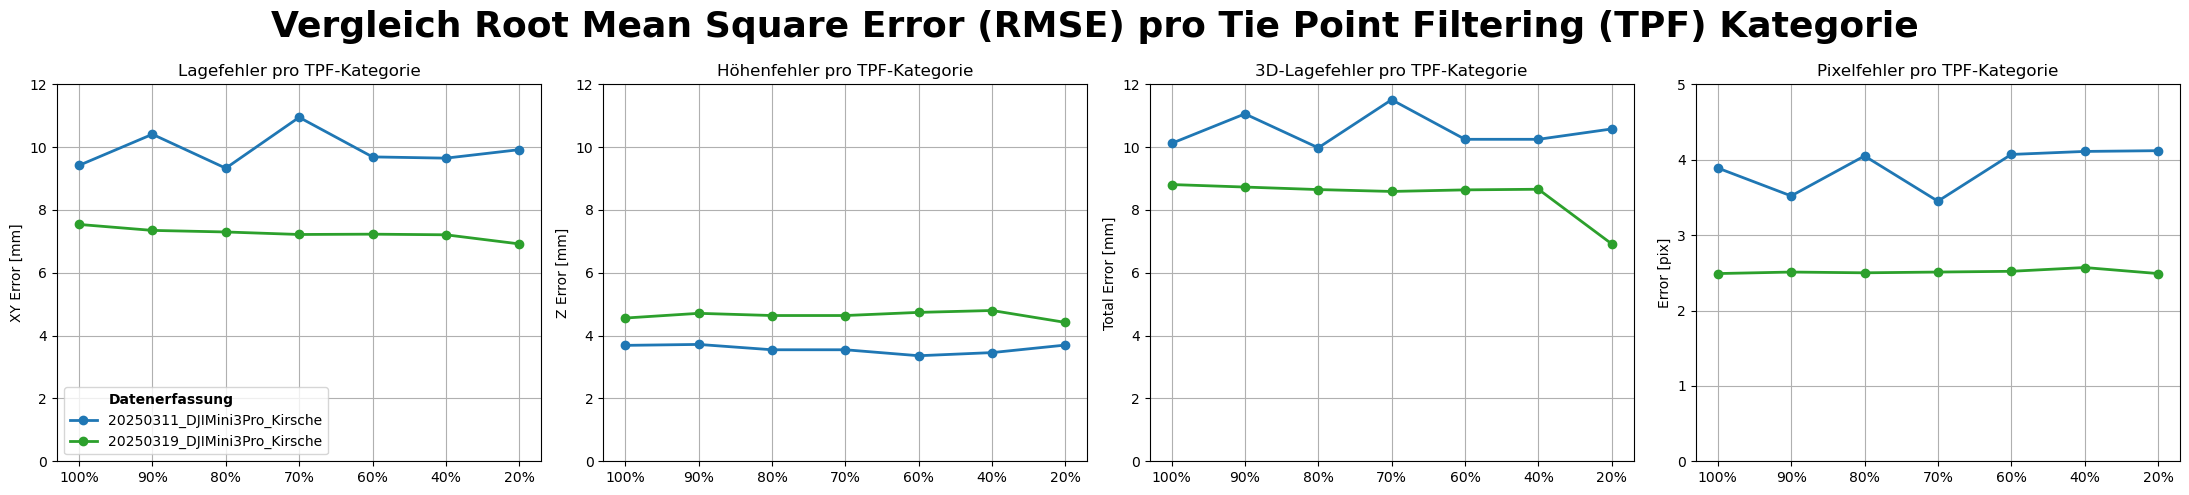

In [57]:
# TPF-Werte als Kategorien
combined_df["TPF"] = pd.Categorical(
    combined_df["TPF"],
    categories=["100%", "90%", "80%", "70%", "60%", "40%", "20%"],
    ordered=True
)

# Attributnamen + Titel + y-Achsenbeschriftung + Achsenskalierung
attributes = [
    ("XY_Error_mm", "Lagefehler pro TPF-Kategorie", "XY Error [mm]", (0, 12)),
    ("Z_Error_mm", "Höhenfehler pro TPF-Kategorie", "Z Error [mm]", (0, 12)),
    ("Total_Error_mm", "3D-Lagefehler pro TPF-Kategorie", "Total Error [mm]", (0, 12)),
    ("Error_pix", "Pixelfehler pro TPF-Kategorie", "Error [pix]", (0, 5)),
]

# Farbzuweisung für Aufnahme_IDs
aufnahme_colors = {
    "20250311_DJIMini3Pro_Kirsche": "#1f77b4",        # Blau
    "20250319_DJIMini3Pro_Kirsche": "#2ca02c",        # Grün
    # Platzhalter für weitere IDs
}

# Subplots
fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharex=True)

for ax, (attr, title, ylabel, ylim) in zip(axes, attributes):
    for aufnahme_id, group in combined_df.groupby("Aufnahme_ID"):
        group_sorted = group.sort_values("TPF")
        ax.plot(
            group_sorted["TPF"],
            group_sorted[attr],
            label=aufnahme_id,
            marker="o",
            linewidth=2,
            color=aufnahme_colors[aufnahme_id]
        )
    ax.set_title(title)
    ax.set_ylim(*ylim)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Gemeinsamer Titel für alle Plots
fig.suptitle(
    "Vergleich Root Mean Square Error (RMSE) pro Tie Point Filtering (TPF) Kategorie",
    fontsize=26,
    fontweight="bold"
)

# Legende im XY Error Plot (erster Subplot), unten links
handles, labels = axes[0].get_legend_handles_labels()

# Workaround: „Titel“ als erstes Dummy-Element einfügen
handles = [plt.Line2D([], [], color='none')] + handles
labels = ["Datenerfassung"] + labels

legend = axes[0].legend(handles, labels, loc="lower left", frameon=True)

# Stil anpassen
legend.get_texts()[0].set_weight("bold")     # Titel fett
legend.get_texts()[0].set_fontsize("medium") # ggf. größer

plt.tight_layout()
plt.show()

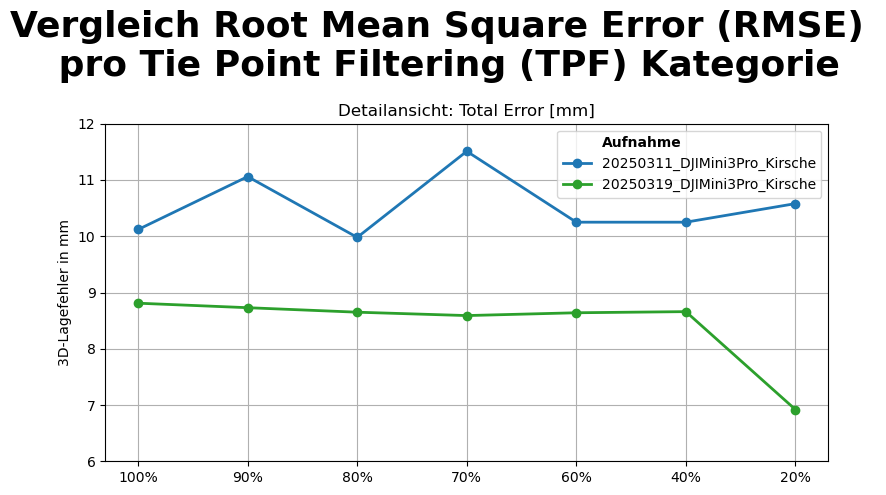

In [56]:
# DETAILPLOT für Total_Error_mm
fig, ax = plt.subplots(figsize=(8, 5))

for aufnahme_id, group in combined_df.groupby("Aufnahme_ID"):
    group_sorted = group.sort_values("TPF")
    ax.plot(
        group_sorted["TPF"],
        group_sorted["Total_Error_mm"],
        label=aufnahme_id,
        marker="o",
        linewidth=2,
        color=aufnahme_colors.get(aufnahme_id, "grey")
    )

ax.set_title("Detailansicht des 3D-Lagefehlers pro TPF-Kategorie")
ax.set_ylabel("Total Error [mm]")
ax.set_ylim(6, 12)
ax.grid(True)

# Gemeinsamer Titel für alle Plots
fig.suptitle(
    "Vergleich Root Mean Square Error (RMSE) \n pro Tie Point Filtering (TPF) Kategorie",
    fontsize=26,
    fontweight="bold"
)

# Legende unten links mit Titel als Dummy-Zeile (Workaround)
handles, labels = ax.get_legend_handles_labels()
handles = [plt.Line2D([], [], color='none')] + handles
labels = ["Aufnahme"] + labels
legend = ax.legend(handles, labels, loc="upper right", frameon=True)
legend.get_texts()[0].set_weight("bold")
legend.get_texts()[0].set_fontsize("medium")

plt.tight_layout()
plt.show()